In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [130]:
plt.rcParams["figure.figsize"] = (20, 6)

In [ ]:
df = pd.read_csv('../data/train.csv')

## Prototype Run 

We'll grab a sample dataset and run it through the process as a prototype so we know what we're coding up.

In [167]:
df_train = df[(df.Store==1) & (df.Dept==1)][0:-3]
df_test = df[(df.Store==1) & (df.Dept==1)][-3:]
df_train['Date'] = pd.to_datetime(df['Date'])
df_test['Date'] = pd.to_datetime(df['Date'])

In [202]:
df_train.tail()

,Store,Dept,ds,y,IsHoliday
135,1,1,2012-09-07,18322.37,True
136,1,1,2012-09-14,19616.22,False
137,1,1,2012-09-21,19251.50,False
138,1,1,2012-09-28,18947.81,False
139,1,1,2012-10-05,21904.47,False


In [243]:
# Get Holidays
holidays = pd.to_datetime(df[(df.Store==1) & (df.Dept==1) & (df.IsHoliday==True)].ds)


df_holidays = pd.DataFrame({
    'holiday': 'holiday',
    'ds': holidays
})

df_holidays.head()

,holiday,ds
1,holiday,2010-02-12
31,holiday,2010-09-10
42,holiday,2010-11-26
47,holiday,2010-12-31
53,holiday,2011-02-11


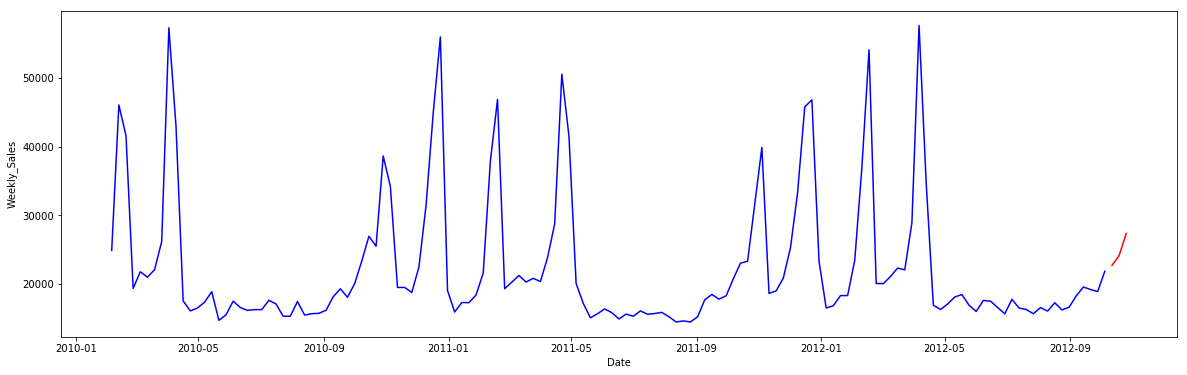

In [173]:
sns.lineplot(data=df_train, x='Date', y='Weekly_Sales', color='blue')
sns.lineplot(data=df_test, x='Date', y='Weekly_Sales', color='red')

In [172]:
from fbprophet import Prophet

In [241]:
# Prepare dataframe for Prophet
df_train.rename(columns={'Date': 'ds', 'Weekly_Sales':'y'}, inplace=True)

model = Prophet(holidays=df_holidays)
model.fit(df_train)
future = model.make_future_dataframe(periods=3, freq='7D')
forecast = model.predict(future)

ValueError: holidays must be a DataFrame with 'ds' and 'holiday' columns.

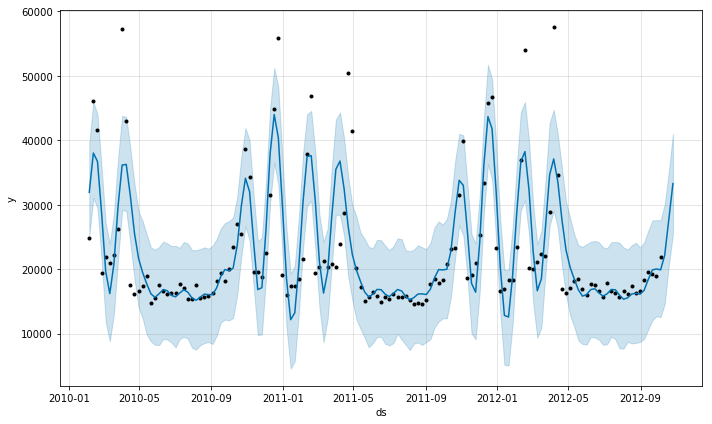

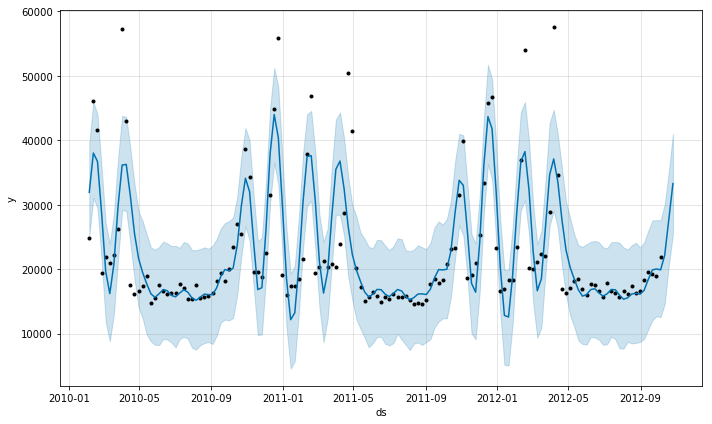

In [229]:
model.plot(forecast)

In [230]:
RMSE = np.sqrt((forecast.yhat[-3:] - df_test.Weekly_Sales)**2 / df_test.size)

In [231]:
RMSE

140     154.203987
141     909.279331
142    1523.450459
dtype: float64

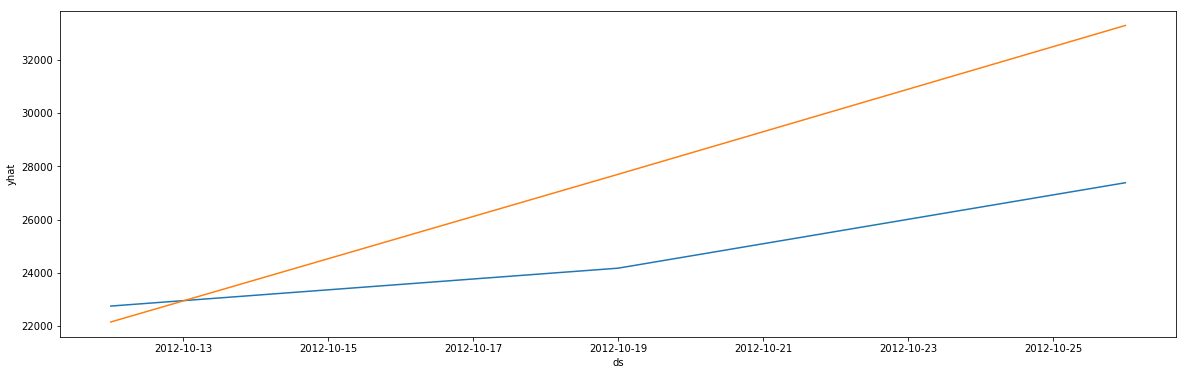

In [232]:
sns.lineplot(data=df_test, x='Date', y='Weekly_Sales')
sns.lineplot(data=forecast[-3:], x='ds', y='yhat')

In [218]:
df_test

,Store,Dept,Date,Weekly_Sales,IsHoliday
140,1,1,2012-10-12,22764.01,False
141,1,1,2012-10-19,24185.27,False
142,1,1,2012-10-26,27390.81,False


In [219]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,22747.347252,24735.077432,39142.595655,22747.347252,22747.347252,9189.418593,9189.418593,9189.418593,9189.418593,9189.418593,9189.418593,0.0,0.0,0.0,31936.765845
1,2010-02-12,22748.281096,30748.714371,44912.547664,22748.281096,22748.281096,15283.925309,15283.925309,15283.925309,15283.925309,15283.925309,15283.925309,0.0,0.0,0.0,38032.206405
2,2010-02-19,22749.214940,28988.525711,43708.049527,22749.214940,22749.214940,13980.943403,13980.943403,13980.943403,13980.943403,13980.943403,13980.943403,0.0,0.0,0.0,36730.158342
3,2010-02-26,22750.148783,21100.887961,36040.594181,22750.148783,22750.148783,5994.913195,5994.913195,5994.913195,5994.913195,5994.913195,5994.913195,0.0,0.0,0.0,28745.061978
4,2010-03-05,22751.082627,12730.811986,27368.294449,22751.082627,22751.082627,-3080.216081,-3080.216081,-3080.216081,-3080.216081,-3080.216081,-3080.216081,0.0,0.0,0.0,19670.866546
5,2010-03-12,22752.449599,8881.455002,23846.666754,22752.449599,22752.449599,-6537.124530,-6537.124530,-6537.124530,-6537.124530,-6537.124530,-6537.124530,0.0,0.0,0.0,16215.325069
6,2010-03-19,22753.816572,13452.635247,28471.375936,22753.816572,22753.816572,-1916.897561,-1916.897561,-1916.897561,-1916.897561,-1916.897561,-1916.897561,0.0,0.0,0.0,20836.919011
7,2010-03-26,22755.183545,22239.506538,36642.602046,22755.183545,22755.183545,6958.197169,6958.197169,6958.197169,6958.197169,6958.197169,6958.197169,0.0,0.0,0.0,29713.380713
8,2010-04-02,22756.550518,28988.514813,43727.387463,22756.550518,22756.550518,13406.549394,13406.549394,13406.549394,13406.549394,13406.549394,13406.549394,0.0,0.0,0.0,36163.099912
9,2010-04-09,22757.917490,28937.627337,44512.032607,22757.917490,22757.917490,13511.652558,13511.652558,13511.652558,13511.652558,13511.652558,13511.652558,0.0,0.0,0.0,36269.570048
